# Python And Finity Element

这个寒假打算做点有意义的事情，比如说。。。学一学有限元？
用py写吧，感觉还是很有意思的哈哈哈！python真是个奇妙而又美丽的语言！

# 章一、python知识初步

## 1.类与继承
由于我有一定的python基础，这里就直接上有限元中一些重要的数据类型定义。比如需要定义一个节点类Node:
其中：需要包括结点受力$F_x,F_y$，结点位移$U_x,U_y$。

In [85]:
class Node:
    def __init__(self,x,y):
        # 定义节点类的初始化_init_()方法，传入参数节点坐标x和y
        #定义属性x,y代表节点的(x,y)坐标
        self.x=x
        self.y=y
        #定义节点力force，字典类型，key分别为"Fx",Fy"
        self.force={"Fx":0,"Fy":0}
        self.disp={"Ux":0,"Uy":0}
        pass
    #获取x，y坐标
    def get_x(self):
        return self.x
        pass
    def get_y(self):
        return self.y
        pass
    #设置x,y坐标
    def set_x(self,val):
        self.x=val
        pass
    def set_y(self,val):
        self.y=val
        pass
    pass

In [86]:
nd=Node(0,1)
print(nd.force)

{'Fx': 0, 'Fy': 0}


当然上述的方法是对于二维平面形式的节点定义，我们可以运用python的继承方式定义三维空间中的节点。

In [87]:
class Node3D(Node):#继承Node类
    def __init__(self,x,y,z):
        Node.__init__(self,x,y)
        #定义属性z代表节点z方向坐标
        self.z=z
        pass
    #定义z坐标
    def get_z(self):
        return self.z
        pass
    #设置z坐标
    def set_z(self,val):
        self.z
        pass

In [88]:
nd=Node3D(0,1,3)
print(nd.get_z())

3


## 2.Numpy的使用

虽然我在之前的学习中有接触过一定的numpy使用，但是总体不是特别完整。因此我尝试着在使用中学习。

In [89]:
import numpy as np
a=np.array([[1,2,3,4],[2,3,4,5],[3,4,5,6],[4,5,6,7]])
print(a)

[[1 2 3 4]
 [2 3 4 5]
 [3 4 5 6]
 [4 5 6 7]]


In [90]:
print("a的维度是：{}".format(a.shape))
print("一共有{}个元素位于其中".format(a.size))

a的维度是：(4, 4)
一共有16个元素位于其中


需注意这里返回的是tuple类型元组数据，仍然使用[]索引

In [91]:
a.T#转置

array([[1, 2, 3, 4],
       [2, 3, 4, 5],
       [3, 4, 5, 6],
       [4, 5, 6, 7]])

In [92]:
a.reshape(8,2)

array([[1, 2],
       [3, 4],
       [2, 3],
       [4, 5],
       [3, 4],
       [5, 6],
       [4, 5],
       [6, 7]])

In [93]:
b=np.array([1,2,3,4])
print("行乘行使用*：",a*b)
print('两矩阵乘积使用.dot()：',a.dot(b))

行乘行使用*： [[ 1  4  9 16]
 [ 2  6 12 20]
 [ 3  8 15 24]
 [ 4 10 18 28]]
两矩阵乘积使用.dot()： [30 40 50 60]


arange函数的用法是(起点，终点，步长)

linspace用法是(起点，等分数，终点)，且二者一般不包括终点，但linspace可选择endpoint属性

In [94]:
print(np.arange(0,10,1))
print(np.linspace(0,9,10))
print(np.linspace(0,10,10,endpoint=False))

[0 1 2 3 4 5 6 7 8 9]
[0. 1. 2. 3. 4. 5. 6. 7. 8. 9.]
[0. 1. 2. 3. 4. 5. 6. 7. 8. 9.]


In [95]:
print(np.zeros((4,4)))
print(np.ones((3,3)))
print(np.empty((2,2)))

[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
[[1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]]
[[ 1.00000000e+00 -6.31578947e-01]
 [-8.63506797e-17  3.15789474e-01]]


In [96]:
print("这么索引矩阵：",a[0:3])
print("这么索引元素：",a[(1,2)])

这么索引矩阵： [[1 2 3 4]
 [2 3 4 5]
 [3 4 5 6]]
这么索引元素： 4


对于线性方程：
$$
Ax=b
$$
有如下函数解法np.linalg.solve(A,b)：

In [97]:
A=np.array([
    [1,2,3,4],
    [2,3,4,6],
    [3,5,8,10],
    [10,12,13,5]
])
result=np.linalg.solve(A,b)
print(result)

[ 1.00000000e+00 -6.31578947e-01 -8.63506797e-17  3.15789474e-01]


# 3、Matplotlib初步

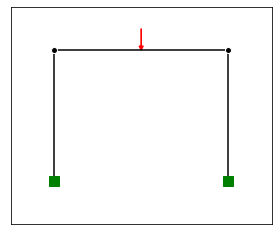

In [106]:
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
def test():
    n1=(0,0)
    n2=(0,3)
    n3=(4,3)
    n4=(4,0)
    nds=[n1,n2,n3,n4]

    #创建图表
    fig=plt.figure()

    #创建坐标轴
    ax=fig.add_subplot(111,aspect='equal')

    #设置刻度
    ax.set_xlim(-1,5)
    ax.set_ylim(-1,4)
    ax.set_xticks([])
    ax.set_yticks([])

    #绘制直线
    for i in range(len(nds)-1):
        x,y=[nds[i][0],nds[i+1][0]],[nds[i][1],nds[i+1][1]]
        line=Line2D(x,y,color='k',linewidth=1.5,marker='o',markeredgecolor='w',markersize=6)
        ax.add_line(line)
        pass

    #绘制支座
    ax.plot(n1[0],n1[1],'gs',markersize=10)
    ax.plot(n4[0],n4[1],'gs',markersize=10)

    #绘制箭头
    ax.arrow(2,3.5,0,-0.5,length_includes_head=True,head_length=0.1,head_width=0.1,color='r')

    plt.show()
    pass

test()